<a href="https://colab.research.google.com/github/ebrarkiziloglu/bogaziciai-winter-camp-2023-ML/blob/main/Workshop%203/Workshop_3_Ebrar_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>bogaziciAI Winter Camp</h1></center>
<center><h2>Workshop 2</h2></center>

<center><h3>Grading Table</h3></center>

<table>
  <col>
  <colgroup span="3"></colgroup>
  <colgroup span="2"></colgroup>
  <tr>
    <td rowspan="1"></td>
    <th colspan="1" scope="colgroup">Part 1</th>>
    <th colspan="1" scope="colgroup">Part 2</th>
    <th colspan="1" scope="colgroup">Total</th>
  </tr>
  <tr>
    <th scope="row">Points</th>
    <td>50</td>
    <td>50</td>
    <td>100</td>
  </tr>
</table>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, preprocessing, model_selection, neighbors, cluster
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import cm
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
import pandas as pd

# Part 1 - K Nearest Neighbors

We will use the famous iris dataset in this part.

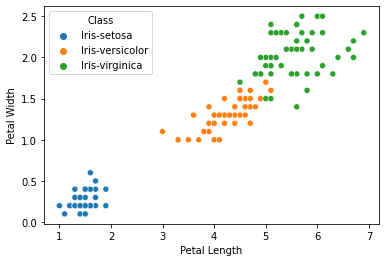

In [ ]:
df = pd.read_csv('iris.data',names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'])
sns.scatterplot('Petal Length', 'Petal Width', data=df, hue='Class')
plt.show()

### Step 1

Split the dataset into train and test sets.

In [ ]:
X = df.drop('Class', axis =1)
y = df['Class']
X_training, X_test, y_training, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

### Step 2

Standardize the dataset

In [ ]:
scaler = preprocessing.StandardScaler()
X_training = scaler.fit_transform(X_training)
X_test = scaler.transform(X_test)
y_training = np.array(y_training)
y_test = np.array(y_test)

### Step 3

Write your custom KNN class

In [ ]:
from collections import Counter
class CustomKNN:
    def __init__(self, k: int) -> None:
      self.k = k
    
    def fit(self, X_training: list, y_training: list) -> None:
      self.X_data = X_training
      self.y_data = y_training
      self.num_of_training_data = len(X_training)

    def find_kNN(self, unlabeled: tuple) -> dict:
      outputs = {}
      for i in range(self.num_of_training_data):
        distance = self.calculate_distance(unlabeled, self.X_data[i])
        outputs[distance] = self.y_data[i]
      outputs
      results = [outputs[distance] for distance in sorted(outputs.keys())[:k]]
      kNN = dict(Counter(results))
      return kNN

    def predict(self, unlabeled: tuple) -> str:
      predicted_outputs = self.find_kNN(unlabeled)
      return max(predicted_outputs.items(), key=lambda x: x[1])[0]
    
    def calculate_accuracy(self, X_test: list, y_test:list) -> float:
      correct = 0
      total = len(X_test)
      for i in range(total):
        if self.predict(X_test[i]) == y_test[i]:
          correct += 1
      return correct / total


    def calculate_distance(self, unlabeled: tuple, labeled: tuple) -> float:
      return np.sum((unlabeled - labeled)**2)

### Step 4

Fit the training data to model

In [ ]:
k_values = np.arange(1, 10)
kNN_instances = {}
for k in k_values:
  my_kNN = CustomKNN(k)
  my_kNN.fit(X_training, y_training)
  kNN_instances[k] = my_kNN

### Step 5

Evaluate the accuracy

In [ ]:
k_statistics = []
for k in k_values:
  accuracy = kNN_instances[k].calculate_accuracy(X_test, y_test)
  k_statistics.append(accuracy)
  print(f"For {k} points, accuracy is {accuracy:.4f}")

For 1 points, accuracy is 0.9737
For 2 points, accuracy is 0.9737
For 3 points, accuracy is 1.0000
For 4 points, accuracy is 0.9737
For 5 points, accuracy is 0.9737
For 6 points, accuracy is 0.9737
For 7 points, accuracy is 0.9737
For 8 points, accuracy is 0.9737
For 9 points, accuracy is 1.0000


### Step 6

Use sklearn's KNN classifier and compare the results

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

For 1 points, accuracy is 0.9737
For 2 points, accuracy is 0.9737
For 3 points, accuracy is 1.0000
For 4 points, accuracy is 1.0000
For 5 points, accuracy is 0.9737
For 6 points, accuracy is 1.0000
For 7 points, accuracy is 0.9737
For 8 points, accuracy is 1.0000
For 9 points, accuracy is 1.0000


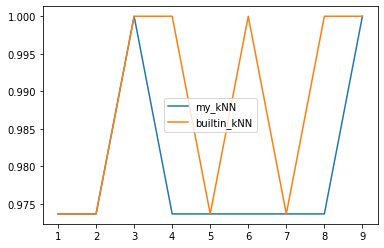

In [ ]:
sklearn_accuracy = []
for k in k_values:
  classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_training, y_training)
  accuracy = classifier.score(X_test, y_test)
  sklearn_accuracy.append(accuracy)
  print(f"For {k} points, accuracy is {accuracy:.4f}")

plt.plot(k_values, k_statistics, label="my_kNN")
plt.plot(k_values, sklearn_accuracy, label="builtin_kNN")
plt.legend()
plt.show()

### Step 7

We have gathered 5 unknown samples below. Predict which sample belongs to which category. <br>
*Hint: You can use classifier.predict(x) method.* <br>
**Extra:** Indicate the probability of prediction.


| Sepal Length | Sepal Width | Petal Length | Petal Width | Class | 
| :-: | :-: | :-: | :-: | :-: |
| 4.5 | 3.0 | 1.5 | 0.5 | Unknown |
| 7.0 | 3.0 | 5.0 | 1.5 | Unknown |
| 6.0 | 2.5 | 5.0 | 2.0 | Unknown |
| 7.0 | 3.0 | 4.5 | 1.0 | Unknown |
| 6.0 | 2.0 | 5.0 | 1.5 | Unknown |

In [ ]:
test_data = np.array([(4.5, 3.0, 1.5, 0.5), 
                       (7.0, 3.0, 5.0, 1.5), 
                       (6.0, 2.5, 5.0, 2.0), 
                       (7.0, 3.0, 4.5, 1.0), 
                       (6.0, 2.0, 5.0, 1.5)])
test_size = len(test_data)
test_data = scaler.transform(test_data)
my_kNN = CustomKNN(5)
my_kNN.fit(X_training, y_training)
predictions = []
for data in test_data:
  prediction = my_kNN.predict(data)
  predictions.append(prediction)

print(f"Custom predictions are:\t\tBuilt-in predictions are:")
builtin_predictions = classifier.predict(test_data)
is_all_results_same = True
for i in range(test_size):
  if predictions[i] != builtin_predictions[i]:
    is_all_results_same = False
  print(f"{predictions[i]}\t\t\t {builtin_predictions[i]}")
if is_all_results_same:
  print("\nAll results are same!")
else:
  print("\nThere are differences in results :( ")

Custom predictions are:		Built-in predictions are:
Iris-setosa			 Iris-setosa
Iris-versicolor			 Iris-versicolor
Iris-virginica			 Iris-virginica
Iris-versicolor			 Iris-versicolor
Iris-versicolor			 Iris-versicolor

All results are same!


# Part 2 - K-Means Clustering

## Dataset
<br>
We use dataset from https://www.kaggle.com/kandij/mall-customers throughout this notebook.

In [ ]:
df = pd.read_csv("segmented_customers.csv")
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


### Step 1
<br>
For this part, we will only use Age and Spending Score columns.
<br>
Plot the dataframe so that "Age" column is on the x axis and "Spending Score (1-100)" is on the y axis.

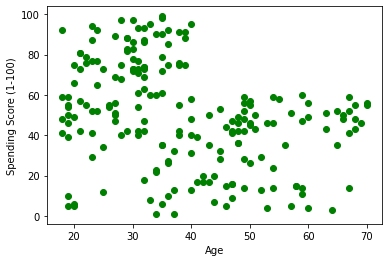

In [ ]:
X_2 = np.array(df[["Age"]])
y_2 = df["Spending Score (1-100)"]
plt.scatter(X_2, y_2, c="green")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [ ]:
scaler = preprocessing.StandardScaler()
X_2 = scaler.fit_transform(X_2)
y_2 = np.array(y_2)

### Step 2
<br>
Implement your own simple Kmeans algorithm without using pre-implemented libraries for KMeans. You can 
refer to the structure below while structuring your code. You do not have to use the same structure. 
Any type of initialization method for your centroids is accepted. You will solely be graded on whether or not your algorithm performs as expected, we will not take the accuracy into account as long as the algorithm gives meaningful results.

In [ ]:
import sys
import copy

class CustomK_means:
    def __init__(self, k: int, X_data: list, y_data: list) -> None:
      self.k = k
      self.data = []
      self.data_size = 0
      self.clusters = []
      self.centroids = []
      self.data_size = len(X_data)
      for x, y in zip(X_data, y_data): 
        self.data.append((np.round(x[0], decimals = 2),(np.round(y, decimals = 2))))

    def initialize_clusters(self) -> None:
      self.centroids = [tuple(np.round(self.data[index], decimals=2)) for index in np.random.choice(np.arange(0, self.data_size), size=self.k, replace=False)]
      self.clusters = [[] for i in range(len(self.centroids))] 
      for data_point in self.data:
        closest_centroid = self.find_centroid(data_point, True)
        self.clusters[self.centroids.index(closest_centroid)].append(data_point)
      return 
    
    def arrange_clusters(self) -> bool:
      previous_clusters = self.update_centroids()
      for data_point in self.data:
        closest_centroid = self.find_centroid(data_point, True)
        self.clusters[self.centroids.index(closest_centroid)].append(data_point)

      if np.array_equal(previous_clusters, self.clusters):
        return False
      return True
    
    def update_centroids(self) -> list:
      self.centroids.clear()
      previous_clusters = copy.deepcopy(self.clusters)
      self.clusters.clear()
      for points in previous_clusters:
        x_mean, y_mean = 0, 0
        for point in points:
          x_mean += point[0]
          y_mean += point[1]
        mean = tuple(np.round([x_mean / len(points), y_mean / len(points)], decimals=2))
        self.centroids.append(mean)
      self.clusters = [[] for i in range(len(self.centroids))] 
      return previous_clusters
    
    def calculate_cost(self) -> float:
      cost = 0
      for i, cluster in enumerate(self.clusters):
        for data in cluster:
          cost += self.calculate_distance(data, self.centroids[i])
      return cost
    
    def find_centroid(self, data_point: tuple, initial: bool) -> tuple:
      min_distance = sys.maxsize
      closest_centroid = None
      for centroid in self.centroids: 
        distance = self.calculate_distance(data_point, centroid)
        if distance < min_distance:
          min_distance = distance
          closest_centroid = tuple([centroid[0], centroid[1]])
      return closest_centroid
    
    def plot(self):
      fig, ax = plt.subplots(figsize=(12, 8))
      color = cm.rainbow(np.linspace(0, 1, k))
      for i, cluster in enumerate(self.clusters):
        for point in cluster:
          ax.scatter(point[0], point[1], color=color[i])
      for centroid in self.centroids:
        ax.scatter(centroid[0], centroid[1], marker='x', color='black', linewidth=3)
    
    def calculate_distance(self, data_point: tuple, reference: tuple) -> float:
      return (np.sum((list(data_point) - np.array(reference))**2))**0.5

### Step 3
<br>
After you complete your algorithm, test it for number of clusters between 1-15. Use elbow method to decide on the
best number of clusters. For the best number of clusters you chose, visualize the clusters and centroids. Comment on your results, what improvements can be made on the algorithm?

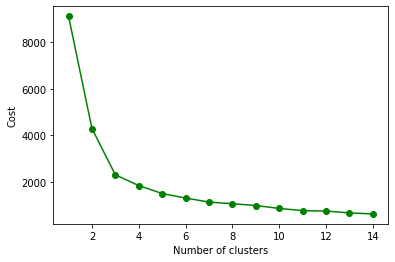

Best value for k is 14


In [ ]:
k_values = np.arange(1, 15)
k_costs = []
for k in k_values:
  mean_cost = 0
  for i in range(8):
    costs = []
    my_kmeans = CustomK_means(k, X_2, y_2)
    centroids = my_kmeans.initialize_clusters()
    initial_cost = my_kmeans.calculate_cost()
    costs.append(initial_cost)
    while my_kmeans.arrange_clusters():
      cost = my_kmeans.calculate_cost()
      costs.append(cost)
    mean_cost += costs[-1]
  mean_cost /= 5
  k_costs.append(mean_cost)

plt.plot(k_values, k_costs, c="green", marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()
best_k = k_values[k_costs.index(min(k_costs))]
print(f"Best value for k is {best_k}")

5


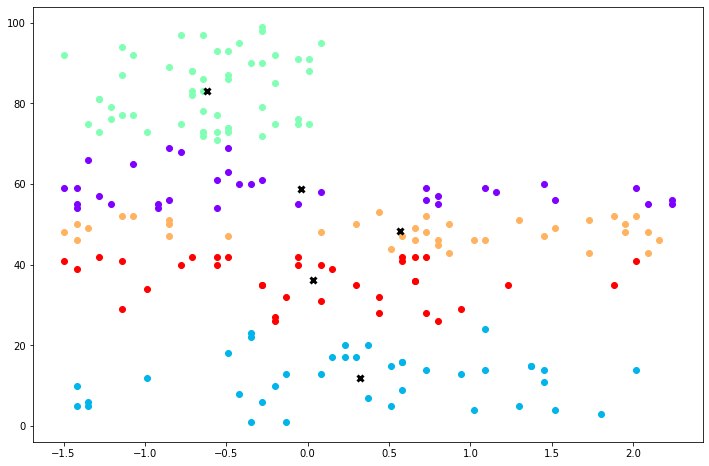

In [ ]:
# Plot the graph:
k = 5
costs = []
my_kmeans = CustomK_means(k, X_2, y_2)
centroids = my_kmeans.initialize_clusters()
initial_cost = my_kmeans.calculate_cost()
costs.append(initial_cost)
while my_kmeans.arrange_clusters():
  cost = my_kmeans.calculate_cost()
  costs.append(cost)
print(len(my_kmeans.clusters))
# print(f"costs are: {costs}")
my_kmeans.plot()

### Step 4
<br>
Use scikit-learn's KMeans class to compare your results with the optimized KMeans algrorithm. Compare it for number of clusters between 1-15 and plot the inertias (hint: you can use scikit-learn's "inertia_" parameter.). Comment on your results.  

In [ ]:
coordinates = []
for x, y in zip(X_2, y_2): 
   coordinates.append((np.round(x[0], decimals = 2),(np.round(y, decimals = 2))))
coordinates = np.array(coordinates)

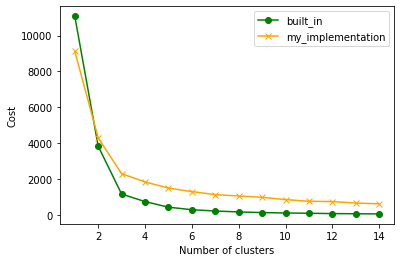

In [ ]:
from sklearn.cluster import KMeans
k_costs_builtin = []
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=0) 
  kmeans.fit(coordinates)
  k_costs_builtin.append(kmeans.inertia_)

k_costs_builtin = [item/12 for item in k_costs_builtin]     # scale
plt.plot(k_values, k_costs_builtin, c="green", marker='o', label="built_in")
plt.plot(k_values, k_costs, c="orange", marker='x', label="my_implementation")
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [ ]:
# As a result, both of the implementation give very similar outcomes. But overall, the builtin k-means method seems better.